<center>
 <h1><b> COVID-19 </b> </h1>
</center>

Coronavirus (COVID-19) is an infectious disease caused by a new virus, which caused a lot of countries to impose nationwide lockdowns in order to prevent its spread. It is also one of the most trendy topics nowadays. A lot of public health orginazitaions from different countries release datasets reflecting the  distribution of confirmed cases and the number of deathes. Analysis of these datasets is very important in order to take necessary steps for stopping the spread of this disease. Your task will be the analysis of one of these datasets:




*   Download the COVID-19 cases worldwide dataset from:

 https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data/resource/55e8f966-d5c8-438e-85bc-c7a5a26f4863

*   Read the data into Pandas Dataframe and name it `covdf`. Check that Dataframe columns are properly read.

*   For each country in the `covdf` Dataframe, determine date of the first confirmed case. Store result as a Pandas Dataframe as well. The resulting Dataframe should have 4 columns: 

  `country_ame` - Name of the country in countriesAndTerritories column  of `covdf`

  `case_date` - the date when first case happened in that ountry

  `pop_data` - popData2018 column  of `covdf`

  `cases` - the number of the cases in the date

*   Write a function which will take the `covdf` Dataframe as argument and return a new Dataframe which will have only the rows where no death has happened. The resulting Dataframe will have exactly the same columns as `covdf`, however only the rows in which there is no death.

*   Calculate the number of overall deathes for each country from `covdf`. Store the result as a Dataframe as well. The resulting Dataframe should have 2 columns: 

  `CountryName` - Name of the country in countriesAndTerritories column  of `covdf`

  `number_of_deathes` - the number of overall deathes in that country.


*   Write a function which will take the `covdf` Dataframe as argument and for each day will calculate the maximum number of deathes and in which country maximum number of deathes has happened.The resulting Dataframe should have 3 columns: 

  `date` - one row for each date in `covdf`.

  `number_of_deathes` - the number of maximum deathes for that specific `date`.

  `CountryName` - Name of the country in which maxiumum number of deathes has happened in that specific day.



*   Create a new Dataframe which will hold the number of overall deathes for each day.The resulting Dataframe should have 2 columns: 

  `date` - one row for each date in `covdf`.

  `number_of_deathes` - the number of overall deathes in that date.


*   Write a function which will take the `covdf` Dataframe and country name as argument and will visualize number of cases in that country for each day. Use Matplotlib for visualization.


*   Write a function which will take the `covdf` Dataframe and two country names as argument and will visualize number of cases in these countries for each day in the same plot. This will allow to compare the number of cases in two countries. Use Matplotlib for visualization.


*   Coronavirus disease spreads primarily through contact with an infected person when they cough or sneeze. It also spreads when a person touches a surface or object that has the virus on it, then touches their eyes, nose, or mouth. Your last task is to protect yourself :)











# Importing libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Tasks
*   Download the COVID-19 cases worldwide dataset from:

 https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data/resource/55e8f966-d5c8-438e-85bc-c7a5a26f4863

*   Read the data into Pandas Dataframe and name it `covdf`. Check that Dataframe columns are properly read.

In [2]:
covdf = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')
covdf

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-04-22,22,4,2020,61,1,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-04-21,21,4,2020,35,2,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-04-20,20,4,2020,88,3,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-04-19,19,4,2020,63,0,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-04-18,18,4,2020,51,1,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
12386,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
12387,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
12388,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
12389,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


*   For each country in the `covdf` Dataframe, determine date of the first confirmed case. Store result as a Pandas Dataframe as well. The resulting Dataframe should have 4 columns: 

  `country_ame` - Name of the country in countriesAndTerritories column  of `covdf`

  `case_date` - the date when first case happened in that ountry

  `pop_data` - popData2018 column  of `covdf`

  `cases` - the number of the cases in the date


In [3]:
res = covdf[covdf.cases != 0]
res = res.groupby('countriesAndTerritories').min()
res = res.loc[:, ['dateRep', 'popData2018', 'cases']]
res

,dateRep,popData2018,cases
countriesAndTerritories,,,
Afghanistan,2020-02-25,37172386.0,1
Albania,2020-03-09,2866376.0,1
Algeria,2020-02-26,42228429.0,1
Andorra,2020-03-03,77006.0,1
Angola,2020-03-22,30809762.0,1
...,...,...,...
Venezuela,2020-03-15,28870195.0,1
Vietnam,2020-01-24,95540395.0,1
Yemen,2020-04-10,28498687.0,1


*   Write a function which will take the `covdf` Dataframe as argument and return a new Dataframe which will have only the rows where no death has happened. The resulting Dataframe will have exactly the same columns as `covdf`, however only the rows in which there is no death.

In [4]:
nodeath = covdf[covdf.deaths == 0]
nodeath

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
3,2020-04-19,19,4,2020,63,0,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-04-13,13,4,2020,52,0,Afghanistan,AF,AFG,37172386.0,Asia
11,2020-04-11,11,4,2020,37,0,Afghanistan,AF,AFG,37172386.0,Asia
15,2020-04-07,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0,Asia
18,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
12385,2020-03-26,26,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
12386,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
12388,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
12389,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


*   Calculate the number of overall deathes for each country from `covdf`. Store the result as a Dataframe as well. The resulting Dataframe should have 2 columns: 

  `CountryName` - Name of the country in countriesAndTerritories column  of `covdf`

  `number_of_deathes` - the number of overall deathes in that country.

In [5]:
numofdeath = covdf.loc[:, ['countriesAndTerritories', 'deaths']]
numofdeath = numofdeath.groupby('countriesAndTerritories').sum()
numofdeath

,deaths
countriesAndTerritories,
Afghanistan,36
Albania,26
Algeria,392
Andorra,37
Angola,2
...,...
Venezuela,10
Vietnam,0
Yemen,0


*   Write a function which will take the `covdf` Dataframe as argument and for each day will calculate the maximum number of deathes and in which country maximum number of deathes has happened.The resulting Dataframe should have 3 columns: 

  `date` - one row for each date in `covdf`.

  `number_of_deathes` - the number of maximum deathes for that specific `date`.

  `CountryName` - Name of the country in which maxiumum number of deathes has happened in that specific day.

In [6]:
mostdead = covdf.loc[:, ['dateRep', 'deaths', 'countriesAndTerritories']]
mostdead = mostdead.groupby('dateRep').max()
mostdead

,deaths,countriesAndTerritories
dateRep,,
2019-12-31,0,Vietnam
2020-01-01,0,Vietnam
2020-01-02,0,Vietnam
2020-01-03,0,Vietnam
2020-01-04,0,Vietnam
...,...,...
2020-04-18,3770,Zimbabwe
2020-04-19,1856,Zimbabwe
2020-04-20,1772,Zimbabwe


*   Create a new Dataframe which will hold the number of overall deathes for each day.The resulting Dataframe should have 2 columns: 

  `date` - one row for each date in `covdf`.

  `number_of_deathes` - the number of overall deathes in that date.

In [7]:
maxdeath = covdf.loc[:, ['dateRep', 'deaths']]
maxdeath = maxdeath.groupby('dateRep').sum()
maxdeath

,deaths
dateRep,
2019-12-31,0
2020-01-01,0
2020-01-02,0
2020-01-03,0
2020-01-04,0
...,...
2020-04-18,8263
2020-04-19,6421
2020-04-20,5145


*   Write a function which will take the `covdf` Dataframe and country name as argument and will visualize number of cases in that country for each day. Use Matplotlib for visualization.

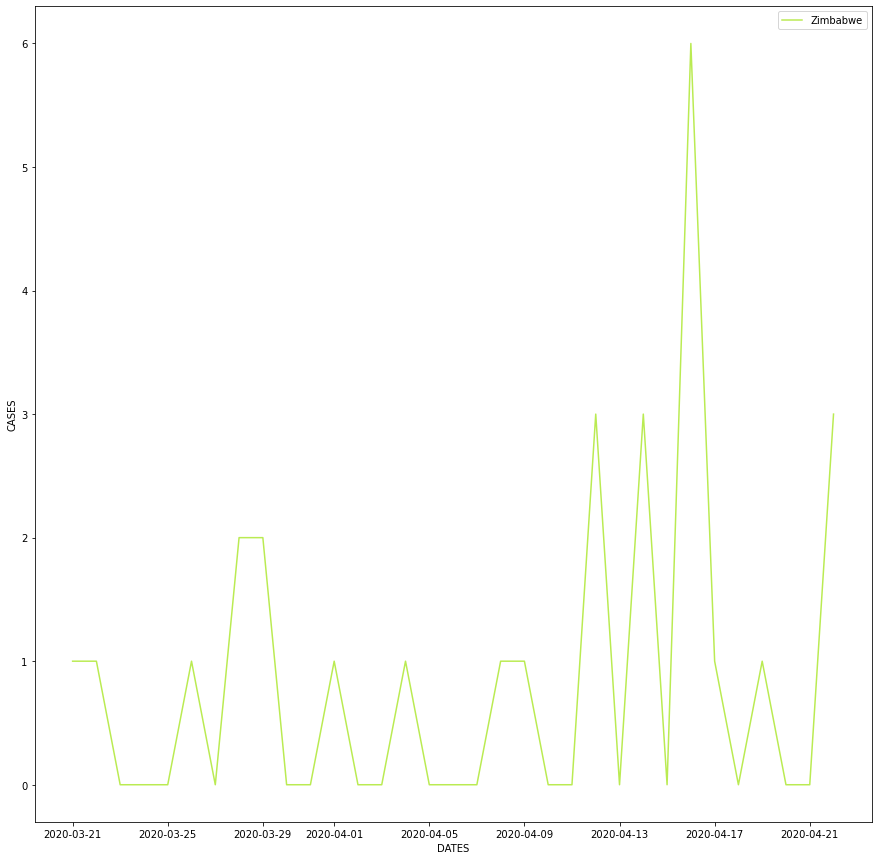

In [8]:
country = 'Zimbabwe'
#assign country name to this variable

plt.figure(figsize = [15, 15])
#decide figure size
plt.plot(covdf[covdf.countriesAndTerritories == country].dateRep, covdf[covdf.countriesAndTerritories == country].cases, color = '#baeb52', label = country)
#creating plot for given country and make color lime with hex color feature, use label parametr for assigning country name
plt.legend()
#made label visible
plt.xlabel('DATES')
plt.ylabel('CASES')
#add label names
plt.show()

*   Write a function which will take the `covdf` Dataframe and two country names as argument and will visualize number of cases in these countries for each day in the same plot. This will allow to compare the number of cases in two countries. Use Matplotlib for visualization.

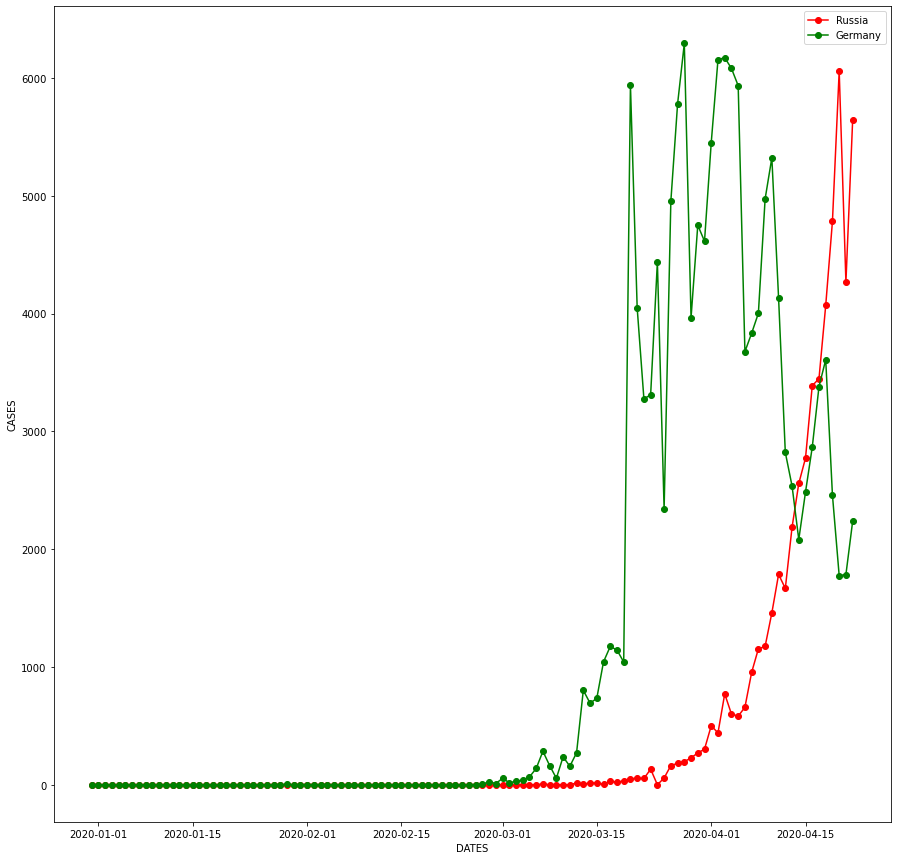

In [11]:
country1 = 'Russia'
country2 = 'Germany'
#assigning countries to variables

data1 = covdf[covdf.countriesAndTerritories == country1].loc[:, ['dateRep', 'cases']]
data2 = covdf[covdf.countriesAndTerritories == country2].loc[:, ['dateRep', 'cases']]
#creating new dataframes for ease of access

plt.figure(figsize =[15, 15])
#set plotsize
plt.plot(data1.dateRep, data1.cases, marker = 'o', color = 'r')
plt.plot(data2.dateRep, data2.cases, marker = 'o', color = 'g')
#creating graphs for given countries, used marker and color params for formatting graph
plt.legend(['{}'.format(country1), '{}'.format(country2)])
#use legend func to show labels, used format method to change names dynamically
plt.xlabel('DATES')
plt.ylabel('CASES')
#add label names
plt.show()